##**Part I**

##**A.**

Note: I put the Augmentation codes in part C to explain it there so in this part we just have VGG and resnet without agumentation.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


Import some libararies

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

Load and preproccess dataset

In [ ]:
data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P1/Dataset"

images = []

disease_name = {'Nevus': 0, 'Melanoma': 1, 'Carcinoma': 2}

for disease_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, disease_folder)):
        label = disease_name[disease_folder]
        images_folder = os.path.join(data_path, disease_folder)

    for filename in os.listdir(images_folder):
        image = load_img(os.path.join(images_folder, filename), target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0
        images.append((image, label))

Shuffle images

In [ ]:
np.random.shuffle(images)

Set the values for X and y and split it to train and test data

In [ ]:
X = np.array([image[0] for image in images])
y = np.array([image[1] for image in images])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make a base VGG16 model and freeze it layers

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


Build our model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(258, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

Train model

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=30,
                    validation_data=(X_test, y_test))


Epoch 1/30
5/5 [==============================] - 19s 2s/step - loss: 60.8013 - accuracy: 0.3913 - val_loss: 57.9336 - val_accuracy: 0.3429
Epoch 2/30
5/5 [==============================] - 1s 195ms/step - loss: 56.3086 - accuracy: 0.4493 - val_loss: 53.6606 - val_accuracy: 0.4857
Epoch 3/30
5/5 [==============================] - 1s 160ms/step - loss: 52.2451 - accuracy: 0.4348 - val_loss: 49.7625 - val_accuracy: 0.5429
Epoch 4/30
5/5 [==============================] - 1s 158ms/step - loss: 48.3346 - accuracy: 0.5652 - val_loss: 46.0742 - val_accuracy: 0.4857
Epoch 5/30
5/5 [==============================] - 1s 199ms/step - loss: 44.7416 - accuracy: 0.5797 - val_loss: 42.6611 - val_accuracy: 0.4286
Epoch 6/30
5/5 [==============================] - 1s 201ms/step - loss: 41.4409 - accuracy: 0.5797 - val_loss: 39.5222 - val_accuracy: 0.5429
Epoch 7/30
5/5 [==============================] - 1s 203ms/step - loss: 38.3708 - accuracy: 0.6304 - val_loss: 36.6870 - val_accuracy: 0.5429
Epoch 8/

Classification report

In [ ]:
from sklearn import metrics
import numpy as np
y_pred = np.around(model.predict(X_test))
y_pred  = np.argmax(y_pred, axis=-1)
print(metrics.classification_report(y_test, y_pred))

2/2 [==============================] - 0s 161ms/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.82      0.90      0.86        10
           2       1.00      0.77      0.87        13

    accuracy                           0.86        35
   macro avg       0.87      0.86      0.86        35
weighted avg       0.87      0.86      0.86        35



Plot accuracy and loss

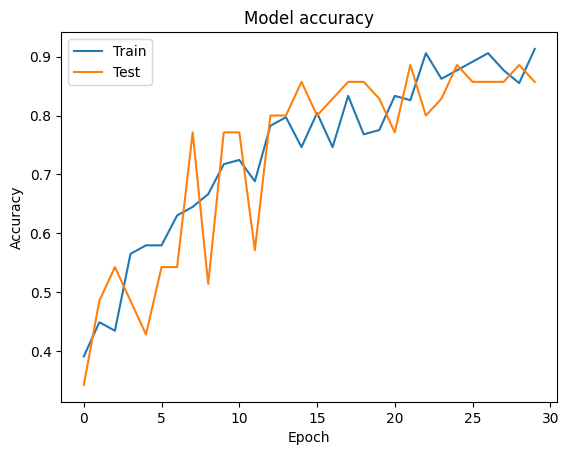

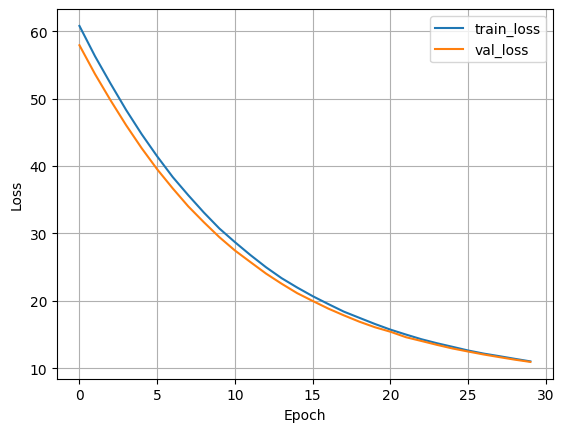

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Load and preproccess dataset

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P1/Dataset"

images = []

disease_name = {'Nevus': 0, 'Melanoma': 1, 'Carcinoma': 2}

for disease_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, disease_folder)):
        label = disease_name[disease_folder]
        images_folder = os.path.join(data_path, disease_folder)

    for filename in os.listdir(images_folder):
        image = load_img(os.path.join(images_folder, filename), target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(np.array(image, dtype=np.float32))
        images.append((image, label))

Shuffle images

In [ ]:
np.random.shuffle(images)

Set the values for X and y and split it to train and test data

In [ ]:
X = np.array([image[0] for image in images])
y = np.array([image[1] for image in images])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make a base model with ResNet 50 and freeze its layers

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model2 = ResNet50( include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


Build the model

In [ ]:
model2 = tf.keras.Sequential([
    base_model2,
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    Dense(3, activation='softmax')
])

Train the model

In [ ]:
opt = Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=20, batch_size=28,
                    validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 58s 2s/step - loss: 25.8150 - accuracy: 0.3841 - val_loss: 26.0581 - val_accuracy: 0.2857
Epoch 2/20
5/5 [==============================] - 2s 321ms/step - loss: 24.6380 - accuracy: 0.6087 - val_loss: 24.8531 - val_accuracy: 0.4571
Epoch 3/20
5/5 [==============================] - 2s 327ms/step - loss: 23.7269 - accuracy: 0.6449 - val_loss: 23.8065 - val_accuracy: 0.4571
Epoch 4/20
5/5 [==============================] - 2s 313ms/step - loss: 22.8519 - accuracy: 0.7246 - val_loss: 22.7702 - val_accuracy: 0.4857
Epoch 5/20
5/5 [==============================] - 2s 319ms/step - loss: 22.0238 - accuracy: 0.7464 - val_loss: 21.7961 - val_accuracy: 0.5429
Epoch 6/20
5/5 [==============================] - 2s 340ms/step - loss: 21.1361 - accuracy: 0.8333 - val_loss: 20.8908 - val_accuracy: 0.5714
Epoch 7/20
5/5 [==============================] - 2s 333ms/step - loss: 20.3329 - accuracy: 0.8768 - val_loss: 20.0648 - val_accuracy: 0.6857
Epoch 8/

Classification report

In [ ]:
from sklearn import metrics
import numpy as np
y_pred = np.around(model.predict(X_test))
y_pred  = np.argmax(y_pred, axis=-1)
print(metrics.classification_report(y_test, y_pred))

2/2 [==============================] - 0s 150ms/step
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.29      0.20      0.24        10
           2       0.47      0.89      0.62         9

    accuracy                           0.49        35
   macro avg       0.46      0.51      0.46        35
weighted avg       0.49      0.49      0.46        35



Plot loss and accuracy

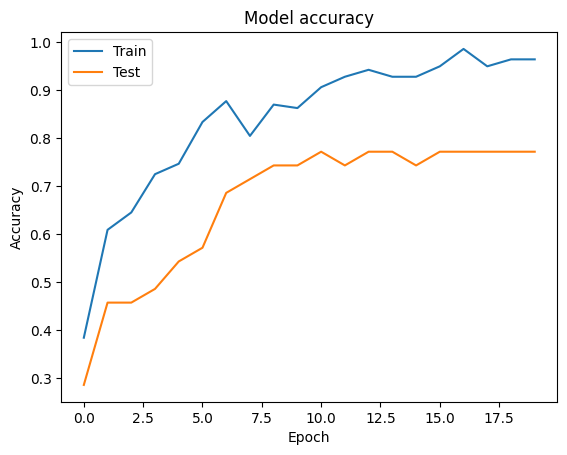

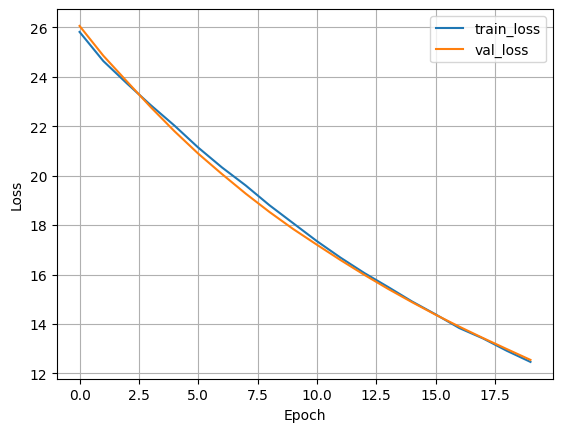

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

##**B.The architecture of VGG16 and Resnet50**

##VGG16
The VGG-16 architecture is a deep convolutional neural network (CNN) designed for image classification tasks. It was introduced by the Visual Geometry Group at the University of Oxford. VGG-16 is characterized by its simplicity and uniform architecture, making it easy to understand and implement.

The VGG-16 configuration typically consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. These layers are organized into blocks, with each block containing multiple convolutional layers followed by a max-pooling layer for downsampling.

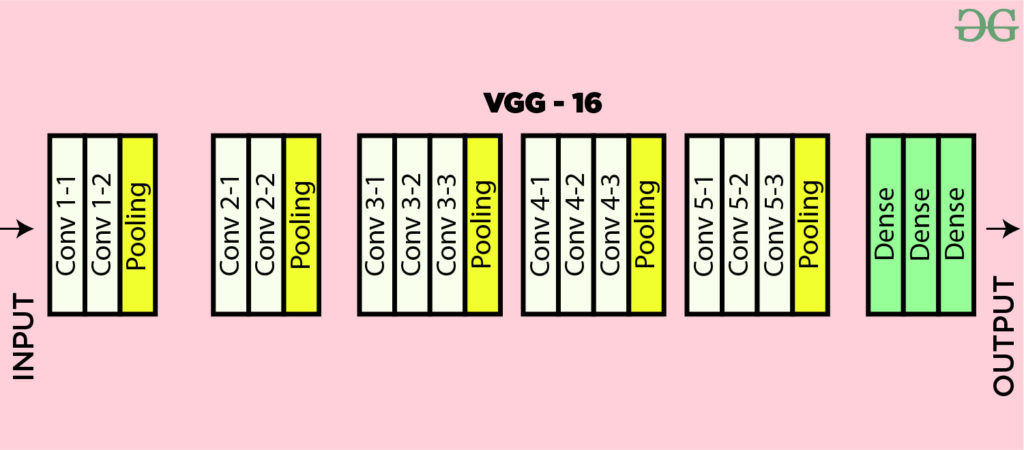

Source: www.geeksforgeeks.org

Here’s a breakdown of the VGG-16 architecture based on the provided details:

1. Input Layer:
   
   Input dimensions: (224, 224, 3)
2. Convolutional Layers (64 filters, 3×3 filters, same padding):

  Two consecutive convolutional layers with 64 filters each and a filter size of 3×3.

  Same padding is applied to maintain spatial dimensions.
3. Max Pooling Layer (2×2, stride 2):
  
  Max-pooling layer with a pool size of 2×2 and a stride of 2.

4. Convolutional Layers (128 filters, 3×3 filters, same padding):
  
  Two consecutive convolutional layers with 128 filters each and a filter size of 3×3.
5. Max Pooling Layer (2×2, stride 2):

  Max-pooling layer with a pool size of 2×2 and a stride of 2.
6. Convolutional Layers (256 filters, 3×3 filters, same padding):

  Two consecutive convolutional layers with 256 filters each and a filter size of 3×3.
7. Convolutional Layers (512 filters, 3×3 filters, same padding):

  Two sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
8. Max Pooling Layer (2×2, stride 2):

  Max-pooling layer with a pool size of 2×2 and a stride of 2.

9. Stack of Convolutional Layers and Max Pooling:
  
  Two additional convolutional layers after the previous stack.
  
  Filter size: 3×3.
10. Flattening:
  
  Flatten the output feature map (7x7x512) into a vector of size 25088.
11. Fully Connected Layers:

  Three fully connected layers with ReLU activation.

  First layer with input size 25088 and output size 4096.

  Second layer with input size 4096 and output size 4096.

  Third layer with input size 4096 and output size 1000, corresponding to the 1000 classes in the ILSVRC challenge.

  Softmax activation is applied to the output of the third fully connected layer for classification.


This architecture follows the specifications provided, including the use of ReLU activation function and the final fully connected layer outputting probabilities for 1000 classes using softmax activation.

##ResNet50
ResNet-50 consists of 50 layers that are divided into 5 blocks, each containing a set of residual blocks. The residual blocks allow for the preservation of information from earlier layers, which helps the network to learn better representations of the input data.

This is an ResNet50 CNN for distinguishing covid-19 by Xray photo.

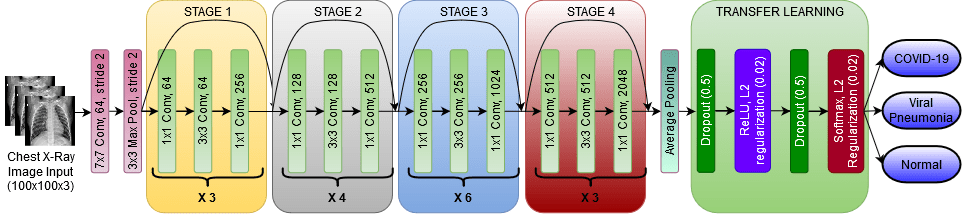

Source: https://open-instruction.com/

1. Convolutional Layers

  The first layer of the network is a convolutional layer that performs convolution on the input image. This is followed by a max-pooling layer that downsamples the output of the convolutional layer. The output of the max-pooling layer is then passed through a series of residual blocks.

2. Residual Blocks

  Each residual block consists of two convolutional layers, each followed by a batch normalization layer and a rectified linear unit (ReLU) activation function. The output of the second convolutional layer is then added to the input of the residual block, which is then passed through another ReLU activation function. The output of the residual block is then passed on to the next block.

3. Fully Connected Layer

  The final layer of the network is a fully connected layer that takes the output of the last residual block and maps it to the output classes. The number of neurons in the fully connected layer is equal to the number of output classes.

##**C.The Augmentation code**

Import some libararies

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

Load data set and do some preproccess and use data agumentation

In [ ]:
data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P1/Dataset"

images = []

disease_name = {'Nevus': 0, 'Melanoma': 1, 'Carcinoma': 2}

for disease_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, disease_folder)):
        label = disease_name[disease_folder]
        images_folder = os.path.join(data_path, disease_folder)

    for filename in os.listdir(images_folder):
        image = load_img(os.path.join(images_folder, filename), target_size=(224, 224))
        image_rotated = image.rotate(90)
        image = img_to_array(image)
        image = image / 255.0
        images.append((image, label))
        image_rotated = img_to_array(image_rotated)
        image_rotated = image_rotated  / 255.0
        images.append((image_rotated , label))


Shuffle images

In [ ]:
np.random.shuffle(images)

Set the values for X and y and split them to train and test data

In [ ]:
X = np.array([image[0] for image in images])
y = np.array([image[1] for image in images])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make a VGG16 as a base model and freeze its layers

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(258, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

Train the model

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30,
                    validation_data=(X_test, y_test))

Epoch 1/50
10/10 [==============================] - 8s 698ms/step - loss: 58.8291 - accuracy: 0.3768 - val_loss: 53.7001 - val_accuracy: 0.5429
Epoch 2/50
10/10 [==============================] - 2s 155ms/step - loss: 50.5495 - accuracy: 0.4964 - val_loss: 46.1674 - val_accuracy: 0.7429
Epoch 3/50
10/10 [==============================] - 2s 157ms/step - loss: 43.4168 - accuracy: 0.5507 - val_loss: 39.6933 - val_accuracy: 0.7143
Epoch 4/50
10/10 [==============================] - 2s 185ms/step - loss: 37.3827 - accuracy: 0.5507 - val_loss: 34.2742 - val_accuracy: 0.5714
Epoch 5/50
10/10 [==============================] - 2s 199ms/step - loss: 32.3130 - accuracy: 0.6123 - val_loss: 29.6913 - val_accuracy: 0.7429
Epoch 6/50
10/10 [==============================] - 2s 192ms/step - loss: 28.0872 - accuracy: 0.6123 - val_loss: 25.9481 - val_accuracy: 0.6857
Epoch 7/50
10/10 [==============================] - 1s 151ms/step - loss: 24.6039 - accuracy: 0.6594 - val_loss: 22.7853 - val_accuracy:

geting a report

In [ ]:
from sklearn import metrics
import numpy as np
y_pred = np.around(model.predict(X_test))
y_pred  = np.argmax(y_pred, axis=-1)
print(metrics.classification_report(y_test, y_pred))

3/3 [==============================] - 0s 148ms/step
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.89      0.80      0.84        30
           2       0.89      1.00      0.94        16

    accuracy                           0.84        70
   macro avg       0.85      0.86      0.85        70
weighted avg       0.84      0.84      0.84        70



Plot the result

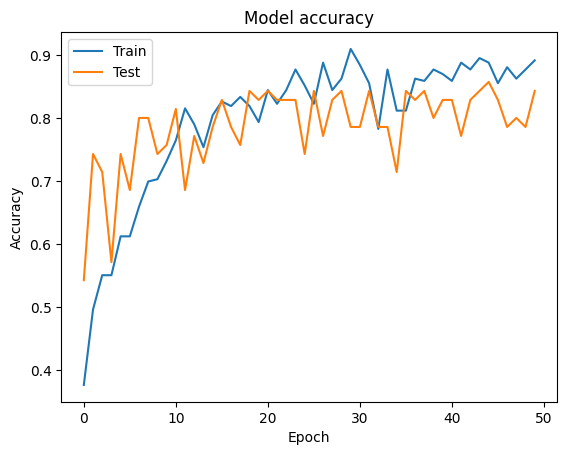

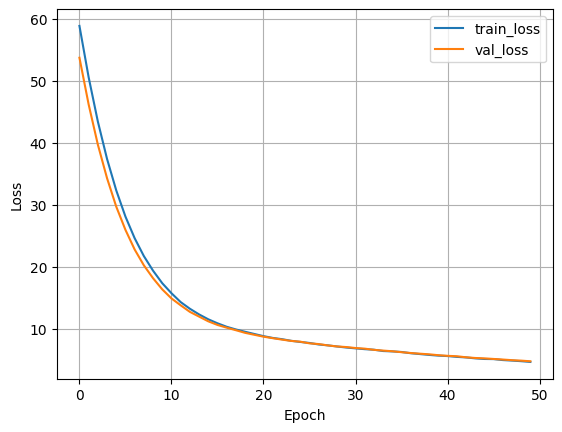

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Load data and use augmentation

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P1/Dataset"

images = []

disease_name = {'Nevus': 0, 'Melanoma': 1, 'Carcinoma': 2}

for disease_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, disease_folder)):
        label = disease_name[disease_folder]
        images_folder = os.path.join(data_path, disease_folder)

    for filename in os.listdir(images_folder):
        image = load_img(os.path.join(images_folder, filename), target_size=(224, 224))
        image_rotated = image.rotate(90)
        image = img_to_array(image)
        image = preprocess_input(np.array(image, dtype=np.float32))
        images.append((image, label))
        image_rotated = img_to_array(image_rotated)
        image_rotated = preprocess_input(np.array(image_rotated, dtype=np.float32))
        images.append((image_rotated, label))

Shuffle images

In [ ]:
np.random.shuffle(images)

Set X and y values and split the data to train and test


In [ ]:
X = np.array([image[0] for image in images])
y = np.array([image[1] for image in images])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using ResNet50 as base model and freeze its layers

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model2 = ResNet50( include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

Build our model

In [ ]:
model2 = tf.keras.Sequential([
    base_model2,
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    Dense(3, activation='softmax')
])

Train our model

In [ ]:
opt = Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=20, batch_size=28,
                    validation_data=(X_test, y_test))

Epoch 1/20
10/10 [==============================] - 56s 1s/step - loss: 25.3502 - accuracy: 0.4529 - val_loss: 24.9051 - val_accuracy: 0.6286
Epoch 2/20
10/10 [==============================] - 3s 325ms/step - loss: 23.6686 - accuracy: 0.7101 - val_loss: 23.5730 - val_accuracy: 0.7429
Epoch 3/20
10/10 [==============================] - 3s 323ms/step - loss: 22.3420 - accuracy: 0.8152 - val_loss: 22.0916 - val_accuracy: 0.7429
Epoch 4/20
10/10 [==============================] - 3s 322ms/step - loss: 21.0854 - accuracy: 0.7971 - val_loss: 20.6859 - val_accuracy: 0.7857
Epoch 5/20
10/10 [==============================] - 3s 322ms/step - loss: 19.7387 - accuracy: 0.8696 - val_loss: 19.3692 - val_accuracy: 0.8286
Epoch 6/20
10/10 [==============================] - 3s 317ms/step - loss: 18.5183 - accuracy: 0.8804 - val_loss: 18.1153 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 4s 365ms/step - loss: 17.3415 - accuracy: 0.9130 - val_loss: 16.9279 - val_accuracy: 0

Get a report

In [ ]:
from sklearn import metrics
import numpy as np
y_pred = np.around(model.predict(X_test))
y_pred  = np.argmax(y_pred, axis=-1)
print(metrics.classification_report(y_test, y_pred))

3/3 [==============================] - 0s 153ms/step
              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.38      0.22      0.28        27
           2       0.48      1.00      0.65        21

    accuracy                           0.51        70
   macro avg       0.58      0.54      0.50        70
weighted avg       0.57      0.51      0.48        70



Plot the result

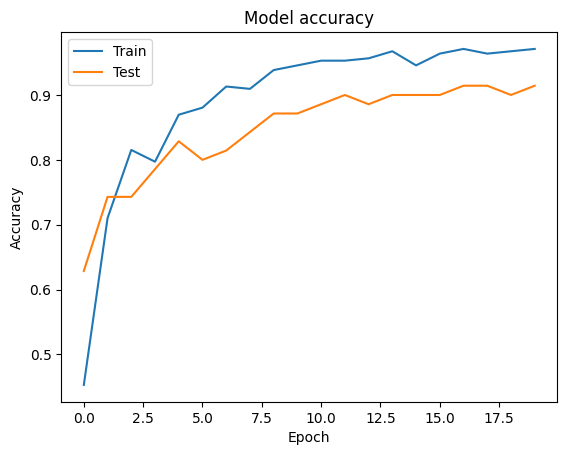

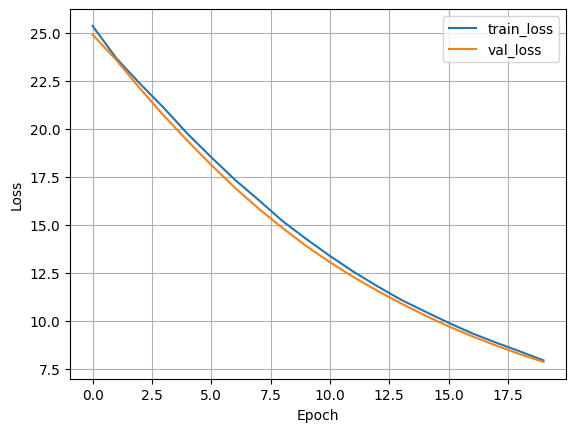

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

##**D.Advantages and disadvantages of data augmentation in Convolutional Neural Networks**

Advantages:

Improving the accuracy of model prediction

Increasing the amount of training data in the models

Lowering data overfitting (a statistical mistake in which a function correlates
too closely to a small number of data points) and increasing data variability

Lowering the cost of data collection and labeling

The increasing generalization ability of the models
Helping resolve class imbalance issues in classification

Disadvantages:


Increased computational cost

Potential for introducing noise

Limited effectiveness for certain tasks(such as tasks where the data is already very diverse.)

##**Part II**

Load Dataset

In [ ]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Check the shape of data

In [ ]:
print(f"Train data shape is {x_train.shape}")
print(f"Test data shape is {x_test.shape}")

Train data shape is (50000, 32, 32, 3)
Test data shape is (10000, 32, 32, 3)


Randomly choose samples and plot them

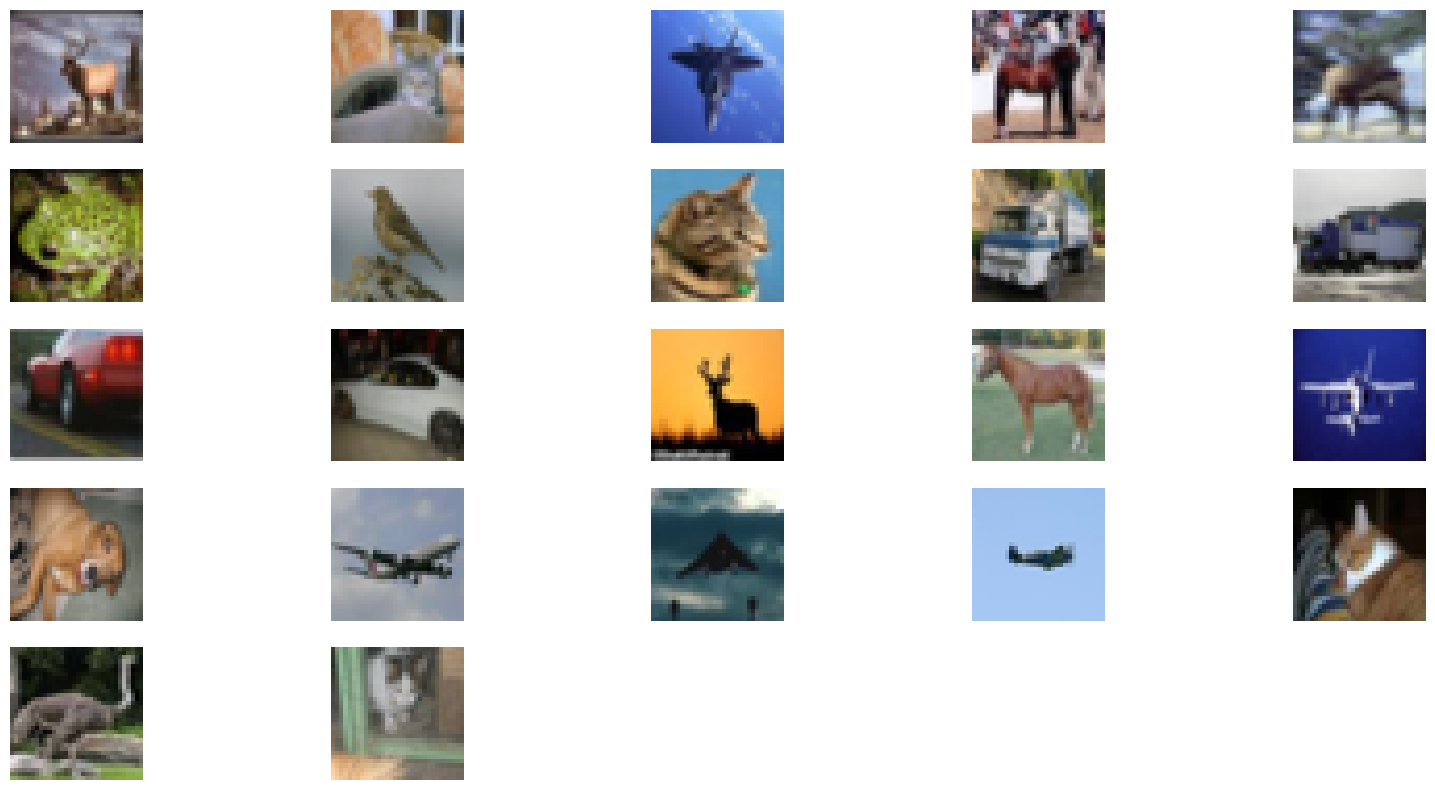

In [ ]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for i in range(22):
    random_index = random.randint(0, 50000)
    plt.subplot(int(22 / 5 + 1), 5, i + 1)
    plt.axis('off')
    plt.imshow(x_train[random_index])
plt.show()

Build a discriminator model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

discriminator = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3136      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         131200    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1)               

Build a generator model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 100

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              827392    
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 32, 32, 256)       524544    
 Transpose)                                                      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 256)       0 

Show how we build a GAN model

In [ ]:
from tensorflow.keras.optimizers import Adam
discriminator.trainable = False
gan_model = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        generator,
        discriminator
    ],
    name="gan_model",
)
opt = Adam(learning_rate=0.0001)
gan_model.compile(loss='binary_crossentropy', optimizer=opt)
gan_model.summary()

Model: "gan_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 32, 32, 3)         1633411   
                                                                 
 discriminator (Sequential)  (None, 1)                 142529    
                                                                 
Total params: 1775940 (6.77 MB)
Trainable params: 1633411 (6.23 MB)
Non-trainable params: 142529 (556.75 KB)
_________________________________________________________________


Scale data and choose random data for training

In [ ]:
def scale_images(x_train):
    X = x_train.astype('float32')
    X = (X - 127.5) / 127.5
    return X
dataset = scale_images(x_train)
number_of_samples = 32
random_indeces = []
for _ in range(number_of_samples):
  random_indeces.append(random.randint(0, 50000))
random_indeces = np.array(random_indeces)
dataset = dataset[random_indeces]

Build the GAN class and Override train_step

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        generated_images = self.generator(random_latent_vectors)

        combined_images = tf.concat([generated_images, real_images], axis=0)

        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

Saving Generated pics

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))
            plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
            plt.show()

Training GAN model

In [ ]:
epochs = 35

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)



Epoch 1/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6936 - g_loss: 0.6925

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 7s 7s/step - d_loss: 0.6936 - g_loss: 0.6925
Epoch 2/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6942 - g_loss: 0.6919

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6942 - g_loss: 0.6919
Epoch 3/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6946 - g_loss: 0.6911

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6946 - g_loss: 0.6911
Epoch 4/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6949 - g_loss: 0.6905

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6949 - g_loss: 0.6905
Epoch 5/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6951 - g_loss: 0.6898

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6951 - g_loss: 0.6898
Epoch 6/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6957 - g_loss: 0.6892

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6957 - g_loss: 0.6892
Epoch 7/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6959 - g_loss: 0.6883

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 5s 5s/step - d_loss: 0.6959 - g_loss: 0.6883
Epoch 8/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6963 - g_loss: 0.6879

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 7s 7s/step - d_loss: 0.6963 - g_loss: 0.6879
Epoch 9/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6967 - g_loss: 0.6870

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6967 - g_loss: 0.6870
Epoch 10/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6970 - g_loss: 0.6858

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6970 - g_loss: 0.6858
Epoch 11/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6976 - g_loss: 0.6857

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6976 - g_loss: 0.6857
Epoch 12/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6982 - g_loss: 0.6848

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6982 - g_loss: 0.6848
Epoch 13/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6983 - g_loss: 0.6837

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6983 - g_loss: 0.6837
Epoch 14/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6990 - g_loss: 0.6822

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.6990 - g_loss: 0.6822
Epoch 15/35
1/1 [==============================] - ETA: 0s - d_loss: 0.6993 - g_loss: 0.6819

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.6993 - g_loss: 0.6819
Epoch 16/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7000 - g_loss: 0.6802

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.7000 - g_loss: 0.6802
Epoch 17/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7009 - g_loss: 0.6794

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7009 - g_loss: 0.6794
Epoch 18/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7013 - g_loss: 0.6784

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7013 - g_loss: 0.6784
Epoch 19/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7020 - g_loss: 0.6780

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7020 - g_loss: 0.6780
Epoch 20/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7023 - g_loss: 0.6761

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7023 - g_loss: 0.6761
Epoch 21/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7032 - g_loss: 0.6749

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.7032 - g_loss: 0.6749
Epoch 22/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7036 - g_loss: 0.6738

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 5s 5s/step - d_loss: 0.7036 - g_loss: 0.6738
Epoch 23/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7048 - g_loss: 0.6734

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.7048 - g_loss: 0.6734
Epoch 24/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7046 - g_loss: 0.6715

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 5s 5s/step - d_loss: 0.7046 - g_loss: 0.6715
Epoch 25/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7057 - g_loss: 0.6700

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.7057 - g_loss: 0.6700
Epoch 26/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7064 - g_loss: 0.6684

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7064 - g_loss: 0.6684
Epoch 27/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7069 - g_loss: 0.6679

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7069 - g_loss: 0.6679
Epoch 28/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7080 - g_loss: 0.6662

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 4s 4s/step - d_loss: 0.7080 - g_loss: 0.6662
Epoch 29/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7089 - g_loss: 0.6644

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7089 - g_loss: 0.6644
Epoch 30/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7094 - g_loss: 0.6635

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7094 - g_loss: 0.6635
Epoch 31/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7100 - g_loss: 0.6620

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7100 - g_loss: 0.6620
Epoch 32/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7103 - g_loss: 0.6608

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7103 - g_loss: 0.6608
Epoch 33/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7119 - g_loss: 0.6600

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7119 - g_loss: 0.6600
Epoch 34/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7122 - g_loss: 0.6588

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7122 - g_loss: 0.6588
Epoch 35/35
1/1 [==============================] - ETA: 0s - d_loss: 0.7130 - g_loss: 0.6564

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 3s 3s/step - d_loss: 0.7130 - g_loss: 0.6564


##**B.Why does Gradient Ascent works better than Gradient Descent for GAN**

Simply put: It’s because the 2 networks are pulling the gradient descent algorithm in opposite directions, causing it to run in circles.

The basic idea behind GANs is that you put two networks against each other and force them to play a zero-sum game. In order for the GAN to converge the two networks have to reach a Nash equilibrium, where one network stops trying to update its weights. The problem is that both networks try to maximize their output while minimizing their opponent’s, pulling their weights in the direction opposite to that of their opponent’s. This causes the gradient descent to run in circles.

A more mathy explanation would be that when you work with normal gradient descent you try to find fixed points on a conservative vector field. Whereas with GANs you’re trying to perform a simultaneous gradient descent, which deals with non-conservative fields. The problem is that in zero-sum games simultaneous gradient descent never reaches the Nash equilibrium, it just gets stuck.



The generator in a GAN tries to maximize an objective function where it fools the discriminator. While traditional GANs use gradient descent with a flipped objective, using gradient ascent can be a more direct way to express this maximization problem.

Let's see what will happen if we use Gradient Descent for generator.

When we want the model to learn, as you can see in below picture, the gradient is flat in that region but when the fake samples are good the gradient signal is dominated

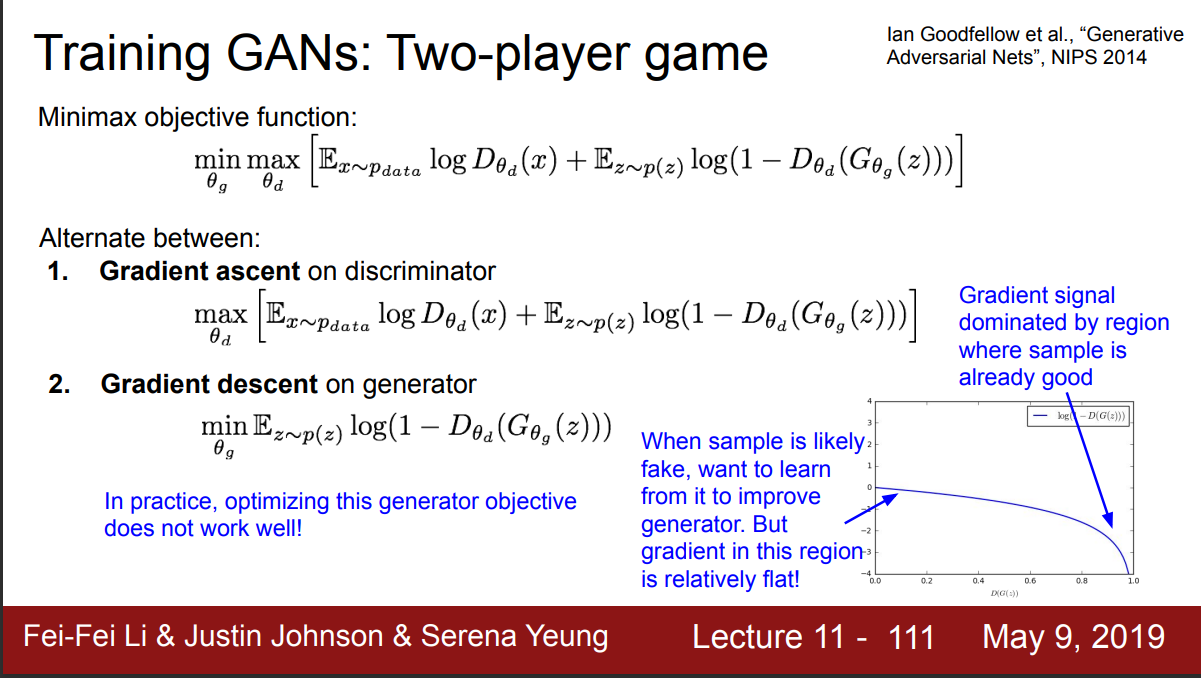

Source: Fei-Fei Li & Justin Johnson & Serena Yeung Lecture 11

Now lets see gradient ascent, it works just the opposite and that's what we want.

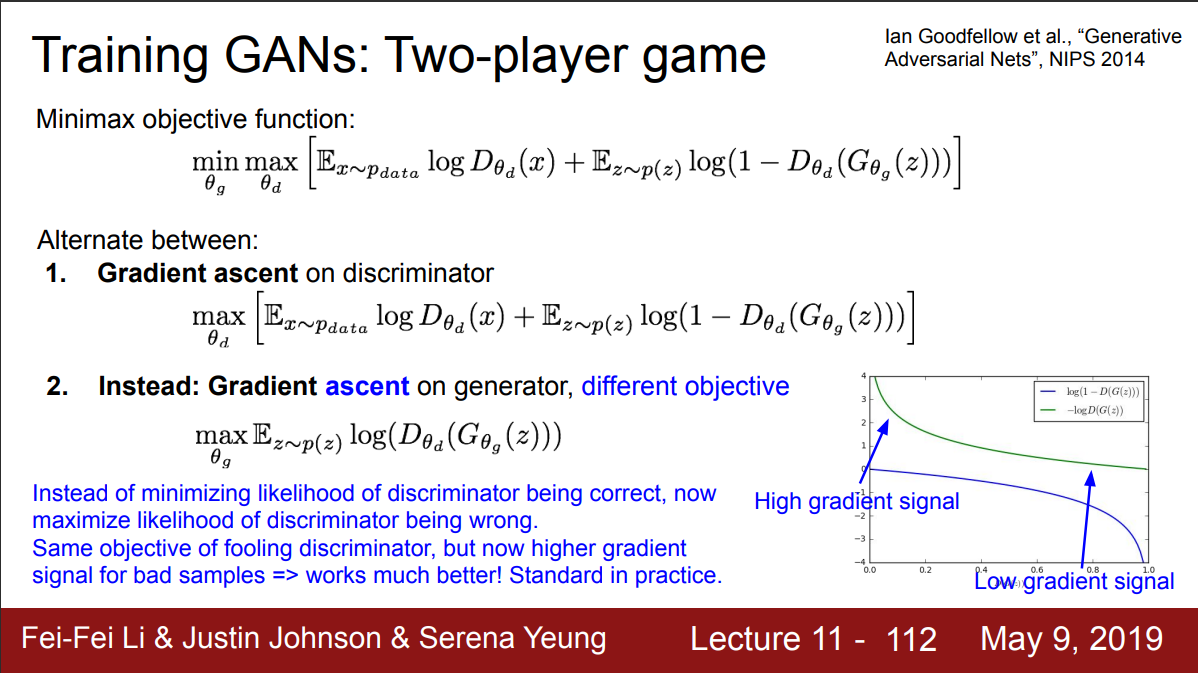

Source: Fei-Fei Li & Justin Johnson & Serena Yeung Lecture 11

##**Part III**

##A. How should you employ Transfer Learning If your dataset is small and very different from the original dataset used to train the pre-trained model? Provide an example using Python and TensorFlow.

In this problem we used fine tuning. For this we can use the pre trained model and just freeze some of the layers and let the other layers to be trained again.The resault would be very better than just freezing all layers.

Import some libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout

Downloading data

In [ ]:
import os

if os.path.exists(os.path.join(os.getcwd(), '/content/COVID19-Data.zip')):
  pass
else:
  !gdown 1PpqhwXJBGm1UAek6WSpjgO2zm-Va_czu
  !unzip /content/COVID19-Data.zip
  !mkdir COVID19
  !mv Chest_COVID/ Chest_NonCOVID/ COVID19

Downloading...
From (original): https://drive.google.com/uc?id=1PpqhwXJBGm1UAek6WSpjgO2zm-Va_czu
From (redirected): https://drive.google.com/uc?id=1PpqhwXJBGm1UAek6WSpjgO2zm-Va_czu&confirm=t&uuid=1f2973cf-de2c-4883-888d-05e5ee9c0ff1
To: /content/COVID19-Data.zip
100% 232M/232M [00:02<00:00, 81.3MB/s]
Archive:  /content/COVID19-Data.zip
   creating: Chest_COVID/
  inflating: Chest_COVID/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg.jpg  
  inflating: Chest_COVID/nejmoa2001191_f1-PA.jpeg.jpg  
  inflating: Chest_COVID/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg  
  inflating: Chest_COVID/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg  
  inflating: __MACOSX/Chest_COVID/._9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg  
  inflating: Chest_COVID/16669_3_1.jpeg  
  inflating: Chest_COVID/radiol.2020201160.fig6b.jpeg  
  inflating: Chest_COVID/covid-19-pneumonia-rapidly-progressive-3-days.jpg  
  inflating: Chest_COVID/16663_1_1.jpg  
  inflating: Ch

Load and preproccess data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

covid_folder = "/content/COVID19"

covid_dataset = image_dataset_from_directory(
    covid_folder,
    batch_size=None,
    shuffle=True,
    )

validation_batches = tf.data.experimental.cardinality(covid_dataset)
validation_set = covid_dataset.take(validation_batches // 5)
training_set = covid_dataset.skip(validation_batches // 5)

print(f'Number of train batches: {tf.data.experimental.cardinality(training_set)}')
print(f'Number of validation batches: {tf.data.experimental.cardinality(validation_set)}')

Found 940 files belonging to 2 classes.
Number of train batches: 752
Number of validation batches: 188


Preproccess data

In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label
train_dataset = training_set.shuffle(752).map(format_image).batch(32)
test_dataset = validation_set.map(format_image).batch(32)

Set ResNet50 as base model and freeze some of its layers

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:15]:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


Build a model

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(258, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

Train the model

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
24/24 [==============================] - 67s 884ms/step - loss: 56.5004 - accuracy: 0.6755 - val_loss: 264460208.0000 - val_accuracy: 0.4415
Epoch 2/10
24/24 [==============================] - 20s 606ms/step - loss: 26.9769 - accuracy: 0.7753 - val_loss: 520268.2500 - val_accuracy: 0.4574
Epoch 3/10
24/24 [==============================] - 22s 624ms/step - loss: 13.2118 - accuracy: 0.8777 - val_loss: 1079275.7500 - val_accuracy: 0.4255
Epoch 4/10
24/24 [==============================] - 24s 729ms/step - loss: 7.9606 - accuracy: 0.8949 - val_loss: 29694.1641 - val_accuracy: 0.4362
Epoch 5/10
24/24 [==============================] - 22s 616ms/step - loss: 5.6047 - accuracy: 0.8989 - val_loss: 1368.5111 - val_accuracy: 0.6064
Epoch 6/10
24/24 [==============================] - 23s 738ms/step - loss: 4.0447 - accuracy: 0.9468 - val_loss: 7.2877 - val_accuracy: 0.9309
Epoch 7/10
24/24 [==============================] - 24s 730ms/step - loss: 3.0613 - accuracy: 0.9654 - val_loss: 

There are some other ways like making a new model, but also take out some features from the layers in the pre-trained model and use them in a newly created model too, or data Augmentation.

##B.How should you employ Transfer Learning If your dataset is small and similar to the original dataset used to train the pre-trained model?

For this we just use the pre trained model it self and freeze its layers to stay pre trained. Its code is just like the first part of this project

Importing some libraries

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

Load and preproccess dataset

In [ ]:
data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P1/Dataset"

images = []

disease_name = {'Nevus': 0, 'Melanoma': 1, 'Carcinoma': 2}

for disease_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, disease_folder)):
        label = disease_name[disease_folder]
        images_folder = os.path.join(data_path, disease_folder)

    for filename in os.listdir(images_folder):
        image = load_img(os.path.join(images_folder, filename), target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0
        images.append((image, label))

Shuffle images

In [ ]:
np.random.shuffle(images)

Set X and y values and split the train and test data

In [ ]:
X = np.array([image[0] for image in images])
y = np.array([image[1] for image in images])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Set Vgg as base model

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

Make our model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(258, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

Train the model

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=30,
                    validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 179s 39s/step - loss: 52.2016 - accuracy: 0.4783 - val_loss: 49.6625 - val_accuracy: 0.3714
Epoch 2/10
5/5 [==============================] - 152s 32s/step - loss: 48.3699 - accuracy: 0.3986 - val_loss: 45.8287 - val_accuracy: 0.5714
Epoch 3/10
5/5 [==============================] - 127s 27s/step - loss: 44.5181 - accuracy: 0.5362 - val_loss: 42.3897 - val_accuracy: 0.4571
Epoch 4/10
5/5 [==============================] - 142s 30s/step - loss: 41.0445 - accuracy: 0.6232 - val_loss: 39.0247 - val_accuracy: 0.7429
Epoch 5/10
5/5 [==============================] - 129s 27s/step - loss: 37.8891 - accuracy: 0.6232 - val_loss: 36.0675 - val_accuracy: 0.6857
Epoch 6/10
5/5 [==============================] - 128s 27s/step - loss: 34.9624 - accuracy: 0.7029 - val_loss: 33.3585 - val_accuracy: 0.6857
Epoch 7/10
5/5 [==============================] - 127s 27s/step - loss: 32.3596 - accuracy: 0.6812 - val_loss: 30.8774 - val_accuracy: 0.7143
Epoch 

Plot the result

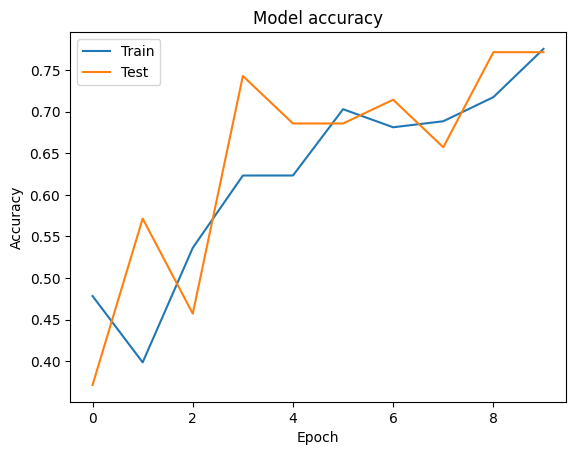

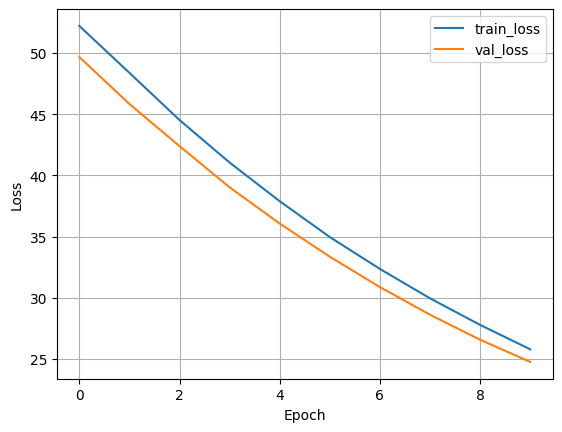

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)